# Long Short Term Memory(LSTM) based - Stock predicition

Aim -to predict the Closing_Price_Prediction using past 60 day stock price.

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')


## Data prep

In [2]:
ticker = 'AAPL'

In [3]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

df = pd.read_csv(r"C:\Users\USER\Downloads\Stock-price-predicition-master\csv files\AAPL.csv")

In [4]:
df.shape

(1593, 13)

In [5]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

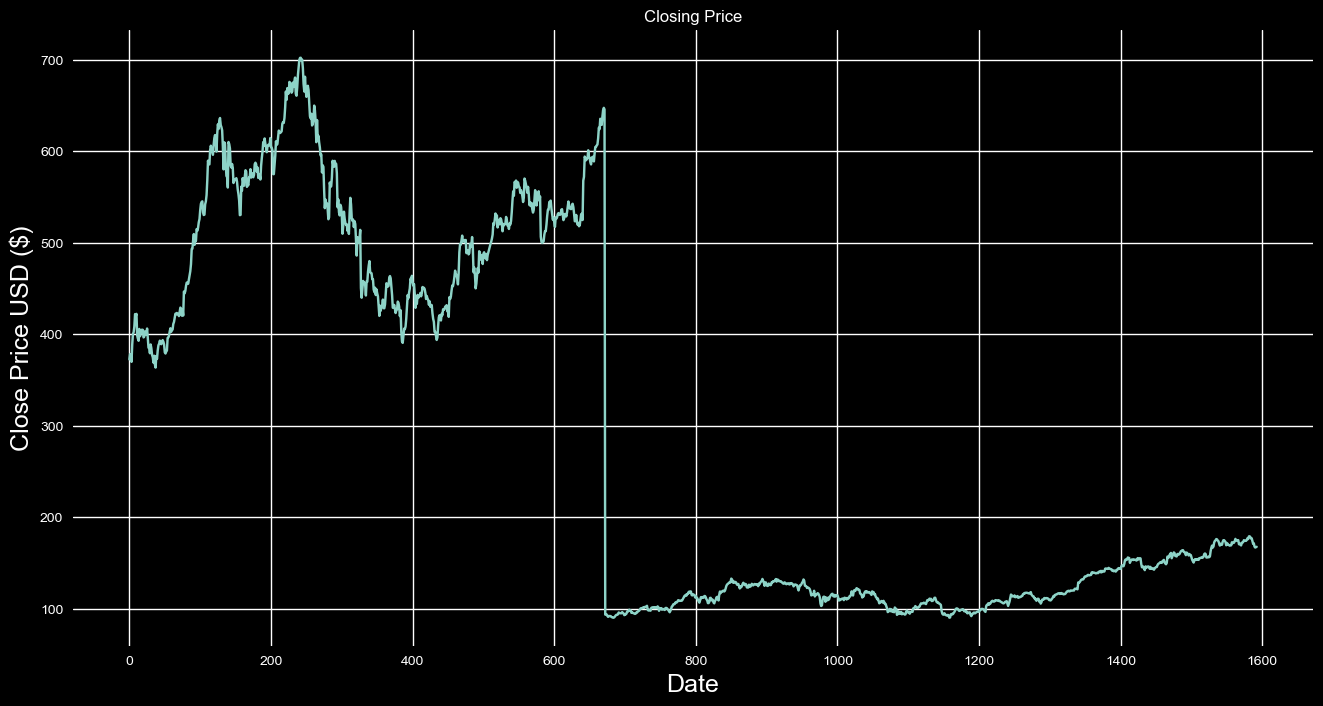

In [6]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1275

In [8]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.46127946],
       [0.47067765],
       [0.46923932],
       ...,
       [0.12534732],
       [0.12609918],
       [0.12667124]])

In [9]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.46127946, 0.47067765, 0.46923932, 0.4568664 , 0.48793763,
       0.50670132, 0.50980681, 0.52000588, 0.54218561, 0.53890033,
       0.54257788, 0.50397176, 0.49856167, 0.49457357, 0.5156582 ,
       0.50258246, 0.507208  , 0.51389298, 0.51431794, 0.51404008,
       0.50052303, 0.50199405, 0.51124514, 0.50661959, 0.50578602,
       0.51641006, 0.49851263, 0.48206989, 0.48108921, 0.47232846,
       0.48797032, 0.48133438, 0.4693047 , 0.46526756, 0.45557517,
       0.46783368, 0.45227354, 0.44668367, 0.46719623, 0.46242359,
       0.4771338 , 0.4864993 , 0.4893923 , 0.49480239, 0.49143539,
       0.48839528, 0.49096139, 0.49579942, 0.49289007, 0.48793763,
       0.47384852, 0.47180543, 0.47520513, 0.47715014, 0.49960773,
       0.50041679, 0.50385734, 0.5116701 , 0.5169004 , 0.51054232])]
[0.5145957961491942]



In [10]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1215, 60, 1)

## Model training 

In [12]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3 )
model.save('keras_model.h5')

Epoch 1/3
1215/1215 [==============================] - 27s 20ms/step - loss: 0.0050
Epoch 2/3
1215/1215 [==============================] - 27s 23ms/step - loss: 0.0022
Epoch 3/3
1215/1215 [==============================] - 29s 24ms/step - loss: 0.0024


## Testing and Validating model

In [15]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [16]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [17]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [18]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


10/10 [==============================] - 1s 15ms/step


In [19]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



3.2894870508027463

In [20]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

C:\Users\USER\AppData\Local\Temp\ipykernel_23376\3813633075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


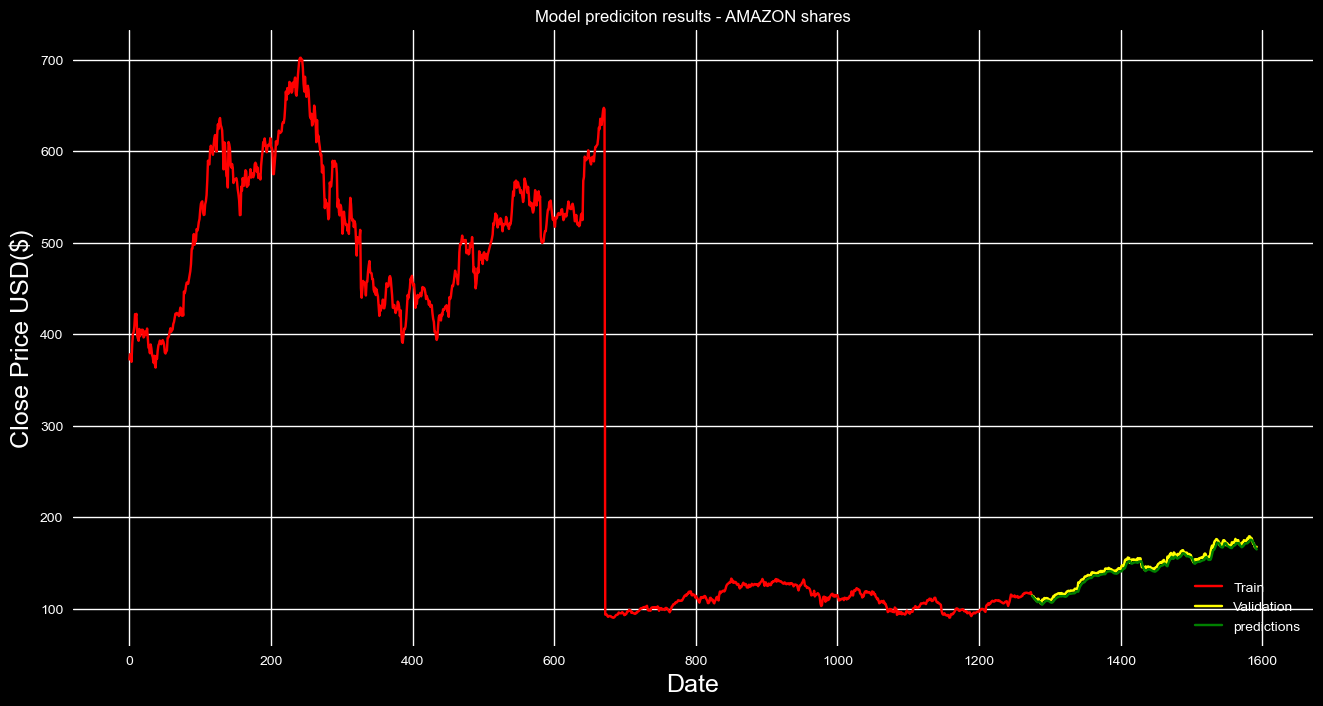

In [21]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - AMAZON shares')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig(r'C:\Users\USER\Downloads\Stock-price-predicition-master\Images')
plt.show()

In [22]:
#Show the valid and predicted prices

valid.tail(15)

,Close,predictions
1578,175.28,171.484146
1579,177.09,171.725891
1580,176.19,172.613831
1581,179.10,173.027283
1582,179.26,174.217911
1583,178.46,175.245102
1584,177.00,175.547882
1585,177.04,174.990707
1586,174.22,174.408829
1587,171.11,173.012741


# Getting predicitions - for tomorrow

In [23]:
#Get the quote
stock_quote = pd.read_csv(r"C:\Users\USER\Downloads\Stock-price-predicition-master\csv files\AAPL.csv")

new_df=stock_quote.filter(['Close'])
#Get last 100 days values and convert into array
last_100_days=new_df[-100:].values

#Scale the data to be values between 0
last_100_days_scaled=scaler.transform(last_100_days)

#Create an empty list
X_test=[]
#Appemd the past 100days
X_test.append(last_100_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow:{pred_price}')

1/1 [==============================] - 1s 1s/step
Price of AAPL tomorrow:[[164.8422]]


In [26]:
stock_quote = pd.read_csv(r"C:\Users\USER\Downloads\Stock-price-predicition-master\csv files\AAPL.csv")

new_df=stock_quote.filter(['Close'])
# Define the number of days to predict
num_days = 30

# Get last 100 days values and convert into array
last_100_days = new_df[-100:].values

# Create an empty list
pred_prices = []

for i in range(30):
    # Scale the data to be values between 0
    last_100_days_scaled = scaler.transform(last_100_days)

    # Append the past 100 days
    X_test = []
    X_test.append(last_100_days_scaled)

    # Convert the X_test data into numpy array and reshape
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get predicted scaled price
    pred_price = model.predict(X_test)

    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)

    # Append the predicted price to the list
    pred_prices.append(pred_price[0][0])

    # Shift the last 100 days by 1 day
    last_100_days = np.append(last_100_days, pred_price, axis=0)[1:]

# Print the predicted prices for the next 30 days
print(f'Predicted prices for the next 30 days of {ticker}:')
print(pred_prices)





1/1 [==============================] - 0s 39ms/step
Predicted prices for the next 30 days of AAPL:
[164.8422, 163.94064, 162.80597, 161.59637, 160.35727, 159.10526, 157.84871, 156.59293, 155.34122, 154.09546, 152.8564, 151.62398, 150.39763, 149.17654, 147.95981, 146.7466, 145.53624, 144.32819, 143.12213, 141.91782, 140.7152, 139.51425, 138.31505, 137.11761, 135.92207, 134.72845, 133.53685, 132.34727, 131.15977, 129.97437]
